## [Finbee.lt  - p2p lending platform dataset.](https://www.finbee.lt/)

Will build 2 models: 

### MODEL 1
Predict: Client Credit Score

### MODEL 2 
#### Assuming starting stage when we are deciding to invest or not.

Predict: If Client will fail on the loan (Default) 

Predict Confidence: Default confidence (Probability client will default)

### Importing needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Reading file

In [2]:
data_xls = pd.read_excel('loans.xlsx', index_col=None)
data_xls.to_csv('loans.csv', encoding='utf-8', index=False)
df = pd.read_csv('loans.csv')
pd.set_option('display.max_columns', None)  

### Exploring data


**listing_id**	Unikalus numeris, kuris suteikiamas kiekvienai paskolai.

**creation_date**	Paskolos paraiškos pateikimo data.

**loan_paid_date**	Paskolos išmokėjimo data.

**first_installement_date**	Pirmos mėnesinės įmokos data.

**loan_paid_status**	Paskolos išmokėjimo statusas (1 – paskola išmokėta, 0 – paskola dar neišmokėta).

**confirm_status**	Paskolos statusas (1 – paskolos gavėjas priėmė paskolos pasiūlymą, 3 – paskola pilnai grąžinta).

**username**	Paskolos gavėjo vartotojo vardas.

**listing_title**	Unikalus paskolos pavadinimas.

**listing_category**	Paskolos paskirtis.

**credit_score**	Paskolos gavėjui suteiktas kredito rizikos balas.

**job_loss_insurance**	Paskolos gavėjui netekus darbo ne savo noru ADB „Gjensidige“ mokės paskolos įmokas iki 6 mėn. (1 – galioja draudimas nuo priverstinio nedarbo, 0 – draudimas nuo priverstinio nedarbo negalioja).

**loan_amount**	Paskolos suma.

**loan_period**	Paskolos terminas mėnesiniais.

**effective_rate**	Paskolos palūkanų norma, kurią paskolos gavėjas moka investuotojams.

**preferred_rate**	Pageidaujama paskolos gavėjo palūkanų norma.

**amount_outstanding**	Likusi negrąžinta paskolos dalis šiai dienai.

**monthly_installment**	Mėnesinė paskolos įmoka.

**principal_repaid**	Grąžinta paskolos dalis.

**interest_paid**	Paskolos gavėjo sumokėtų palūkanų suma.

**arrears**	Visų vėluojančių paskolos įmokų suma.

**loan_status**	Paskolos būsena (ok – nėra vėluojančių įmokų, late – praleista viena paskolos įmoka, arrears – praleistos dvi 

paskolos įmokos, default – praleistos trys ir daugiau paskolos įmokos).

**type**	Paskolos tipas (B – paskola sufinansuota aukcione).

**gender**	Paskolos gavėjo lytis.

**post_town**	Miestas, kuriame gyvena paskolos gavėjas.

**age**	Paskolos gavėjo amžius.

**education**	Paskolos gavėjo išsilavinimas.

**employment_status**	Paskolos gavėjo darbo sutarties tipas paskolos išdavimo momentu.

**occupation**	Paskolos gavėjo užimamos pareigos paskolos išdavimo momentu.

**employ_how_long**	Paskolos gavėjo darbo trukmė mėnesiais dabartinėje darbovietėje.

**years_working_in_total**	Paskolos gavėjo darbo stažas metais.

**dependants**	Nepilnamečių vaikų/išlaikytinių skaičius.

**marital_status**	Paskolos gavėjo vedybininis statusas.

**credit_check_date**	Paskolos gavėjo mokumo vertinimo data.

**monthly_income**	Paskolos gavėjo namų ūkio pajamos, kurias jis gavo paskolos suteikimo metu. Jeigu paskolos gavėjas nėra susituokęs, tuomet namų ūkio pajamas sudaro tik jo vieno pajamos.

**monthly_expenses**	Paskolos gavėjo namų ūkio mokamos kitų paskolų įmokos. Jeigu paskolos gavėjas nėra susituokęs, tuomet namų ūkio paskolų įmokas sudaro tik jo vieno paskolų įmokos.

**available_income**	Grynosios pajamos apskaičiuojamos pagal formulę: namų ūkio mėnesio pajamos – namų ūkio turimų kitų paskolų įmokos.

**dti**	Visų paskolų įmokų ir pajamų santykis apskaičiuojamas pagal formulę: namų ūkio turimų ir naujų paskolų mėnesinės įmokos / namų ūkio grynosios mėnesio pajamos.

**outstanding_debts**	Esama nepadengta skola bet kuriam iš kreditorių, komunalinių, telekomunikacinių paslaugų tiekėjų ir pan., apie kurią buvo informuotas kreditų biuras.

**last_debt_date**	Data, kada buvo registruota paskutinė skola bet kuriam iš kreditorių, komunalinių, telekomunikacinių paslaugų tiekėjų ir pan., apie kurią buvo informuotas kreditų biuras.

In [3]:
df.head()

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date
0,32692,2019-09-04,2019-09-05,2019-10-05,1,1,Raimonda98,"""32692-Automobiliui",Car,D,0,3305,36,0.26,0.26,3305.0,150.63,0.0,0.0,0.0,ok,FR,Female,Prienų r.,21,Vocational education,Employed,Rušiuotojas / Sorting operator,6,3,0,Single,2019-09-04 00:00:00,503,0,503,0.2995,0,-
1,32691,2019-09-04,2019-09-05,2019-10-05,1,1,bkar,"""32691-Vartojimui",Other Purposes,D,0,1900,36,0.26,0.26,1900.0,86.59,0.0,0.0,0.0,ok,FR,Male,Joniškio r.,25,Vocational education,Employed,Mechanikas / Mechanic,3,4,0,Single,2019-09-04 00:00:00,345,17,328,0.3003,0,2018-01-04 00:00:00
2,32687,2019-09-04,2019-09-05,2019-10-05,1,1,vl771013,"""32687-Vartojimui",Other Purposes,C,0,665,12,0.19,0.19,665.0,63.79,0.0,0.0,0.0,ok,FR,Female,Vilnius,41,Graduate,Employed,Vadybininkė / Manager,60,6,1,Married,2019-09-04 00:00:00,1060,197,863,0.2460,0,2016-11-30 00:00:00
3,32674,2019-09-04,2019-09-04,2019-10-04,1,1,karturas,"""32674-Vartojimui",Other Purposes,B,0,1040,12,0.13,0.13,1040.0,96.26,0.0,0.0,0.0,ok,FR,Male,Vilnius,26,High school,Employed,Vairuotojas / Driver,36,7,1,Married,2019-09-04 00:00:00,484,0,484,0.1989,0,-
4,32666,2019-09-04,2019-09-05,2019-10-05,1,1,RasaMeska,"""32666-Vartojimui",Other Purposes,B,0,2830,24,0.13,0.13,2830.0,143.81,0.0,0.0,0.0,ok,FR,Female,Panevėžys,33,Post graduate,Employed,Socialinė darbuotoja / Social worker,15,3,2,Married,2019-09-04 00:00:00,849,21,828,0.1941,0,-


In [6]:
#dataset size
df.shape

(8989, 39)

In [7]:
#Remove rows with missing values
df.isnull().sum()
df = df.dropna()

### Features selection
Based on dataset we see that only following feature may be of value for models:
1. listing_category
2. loan_amount
3. loan_period
4. effective_rate
5. monthly_installment
6. gender
7. post_town - **Don't use** too many values
8. age
9. education
10. employment_status
11. occupation **Dont use** - too many unique
12. employ_how_long
13. years_working_in_total **Don't use** - corrupted, wrong collection
14. dependants
15. marital_status
16. monthly_income
17. monthly_expenses **Don't use** - more than 50% of borrowers declare less than 100EUr/month expenses
18. available_income
19. dti
20. outstanding_debts **Don't use** - no data is collected, most are 0

In [8]:
df.shape

(8989, 39)

### Exploratory analysis


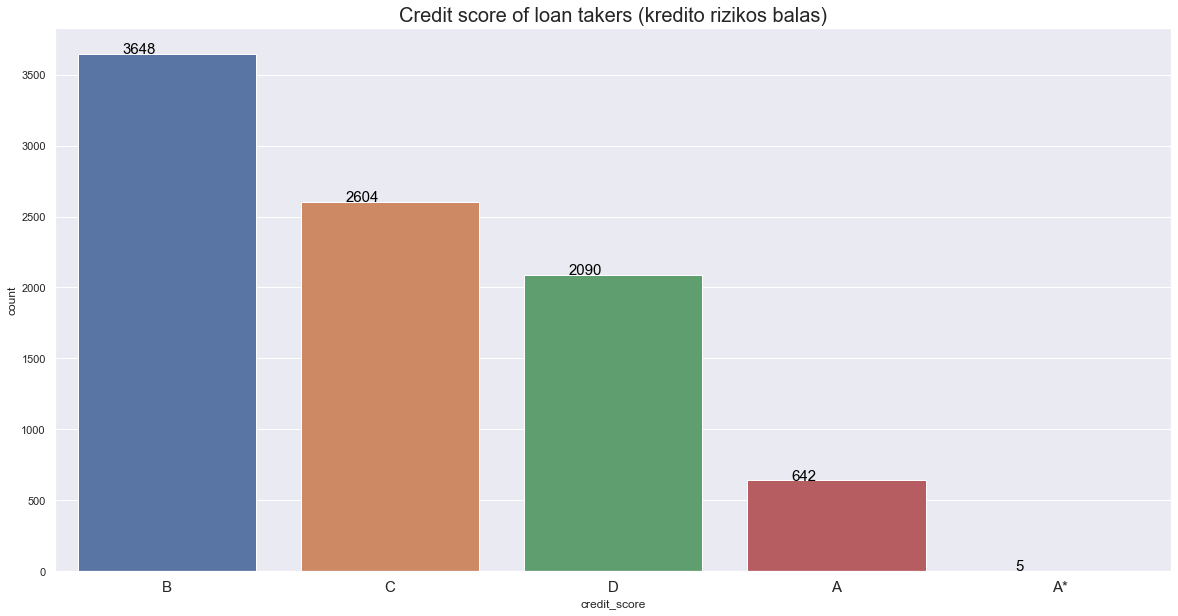

In [9]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='credit_score',data=df,order=df['credit_score'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Credit score of loan takers (kredito rizikos balas)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')

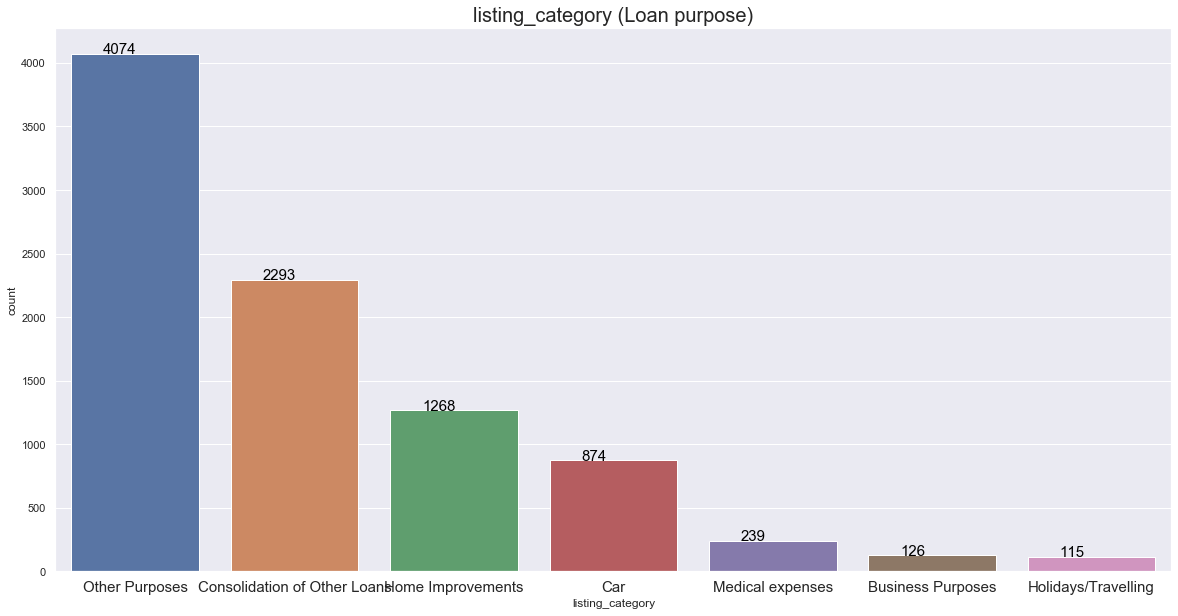

In [10]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='listing_category',data=df,order=df['listing_category'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("listing_category (Loan purpose)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')

Text(0.5, 1.0, 'Monthly payment size in Eur')

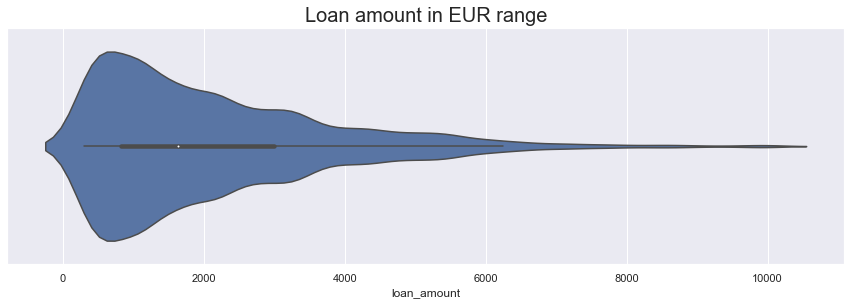

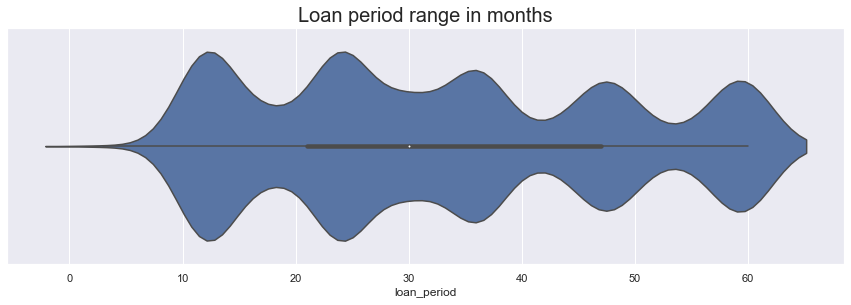

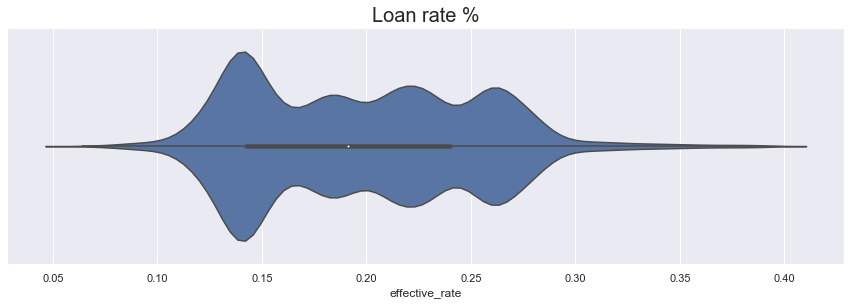

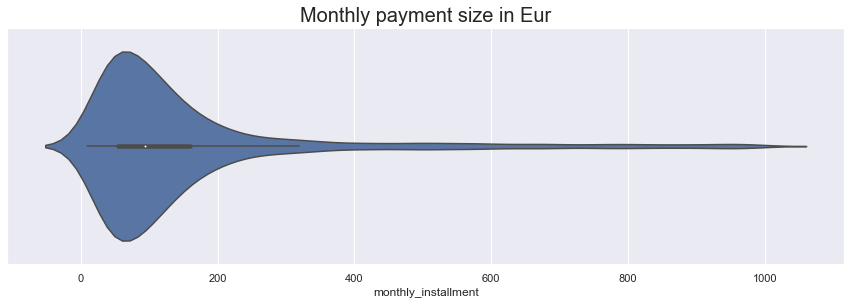

In [11]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
ax = sns.violinplot(x='loan_amount', data=df,) 
ax.set_title('Loan amount in EUR range', fontsize=20)

plt.figure(figsize=(15,20))
plt.subplot(4,1,2)
ax2 = sns.violinplot(x='loan_period', data=df,) 
ax2.set_title('Loan period range in months', fontsize=20)

plt.figure(figsize=(15,20))
plt.subplot(4,1,3)
ax = sns.violinplot(x='effective_rate', data=df,) 
ax.set_title('Loan rate %', fontsize=20)

plt.figure(figsize=(15,20))
plt.subplot(4,1,4)
ax = sns.violinplot(x='monthly_installment', data=df[df['monthly_installment'] < 1000], showfliers=False) 
ax.set_title('Monthly payment size in Eur', fontsize=20)

Text(0.5, 1.0, 'Gender by age')

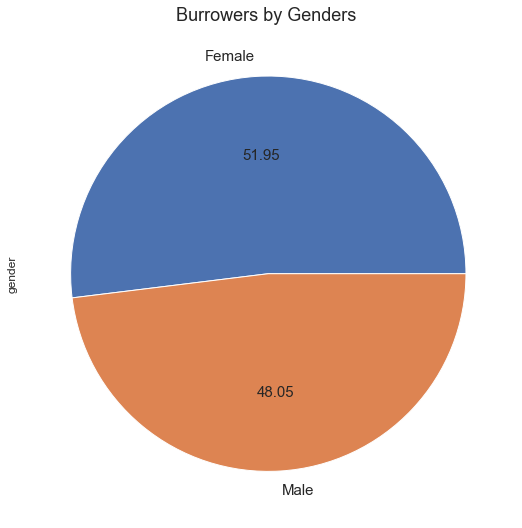

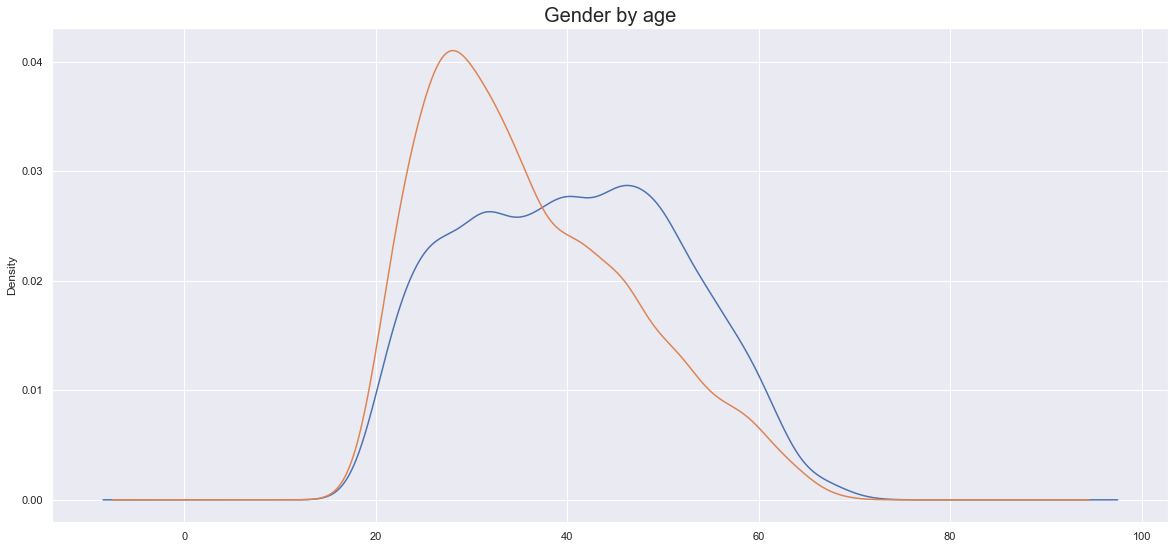

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
df['gender'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Burrowers by Genders ", fontsize=18 )


plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
df.groupby('gender').age.plot(kind='kde')
plt.title('Gender by age',fontsize=20)

Text(0.5, 1.0, 'Burrowers age histogram')

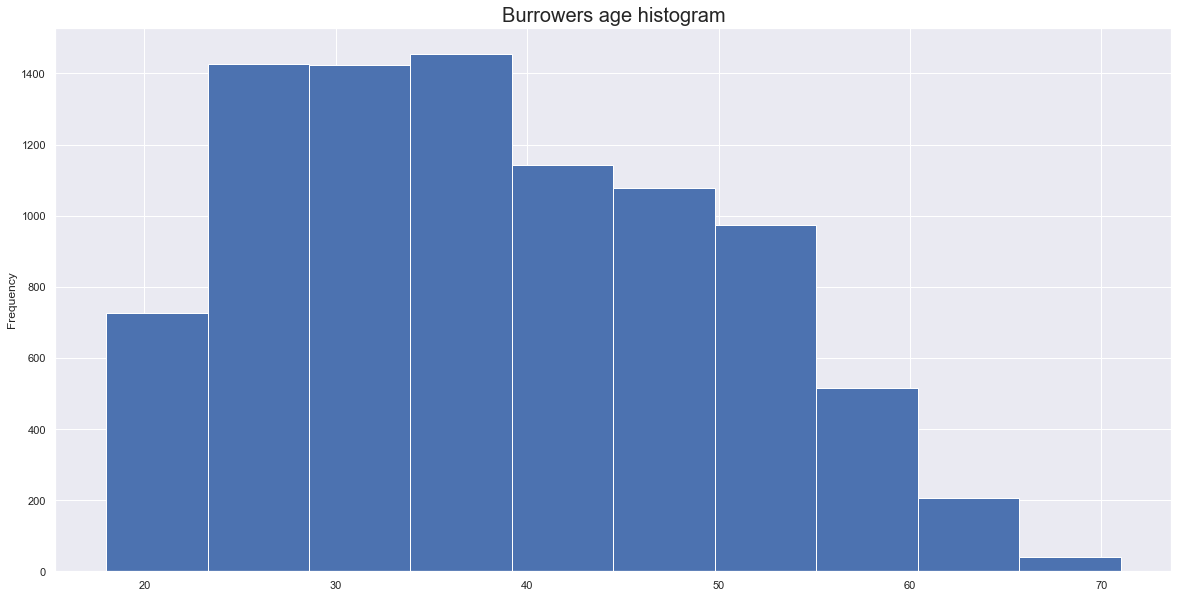

In [13]:
plt.figure(figsize=(20,10))
df['age'].plot.hist()
plt.title('Burrowers age histogram', fontsize=20)

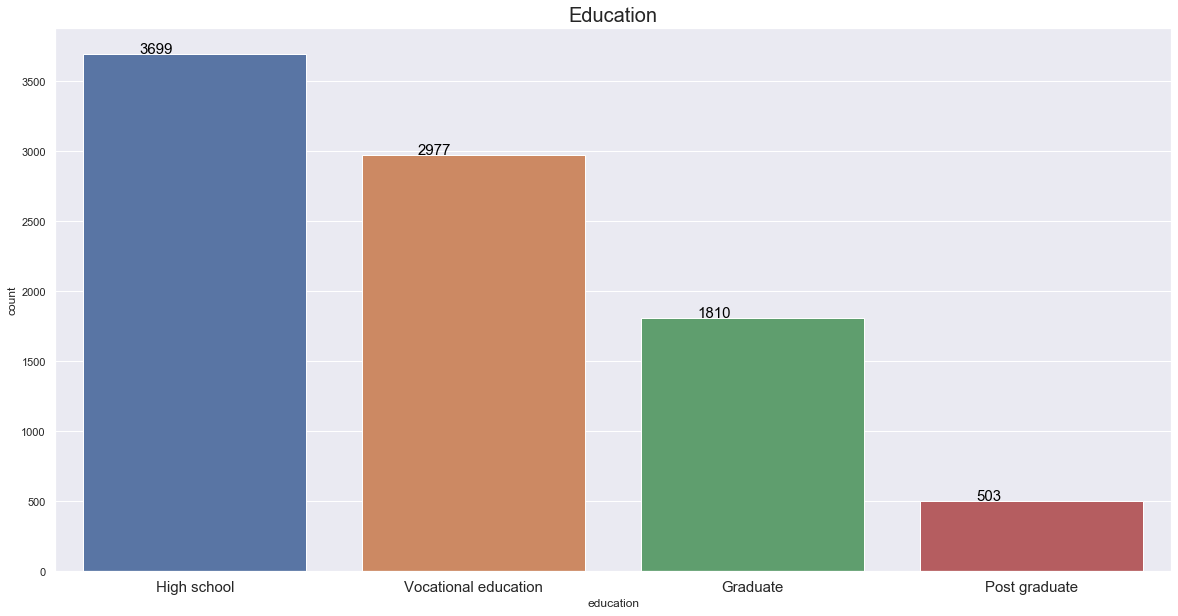

In [14]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='education',data=df,order=df['education'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Education", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')

In [15]:
#occupation - seems to have too mane unique values - not need
len(df['occupation'].unique())

1884

In [16]:
#employ_how_long - Remove words
df.employ_how_long.unique()

array(['6', '3', '60', '36', '15', '24', '72 or more', '18', '12', '48',
       '9'], dtype=object)

In [17]:
df['employ_how_long'] = df['employ_how_long'].astype(str).apply(lambda x: x.strip('or more'))
df.employ_how_long = df.employ_how_long.astype(int)
df.employ_how_long.unique()

array([ 6,  3, 60, 36, 15, 24, 72, 18, 12, 48,  9], dtype=int64)

Text(0.5, 1.0, 'Employed months at current work')

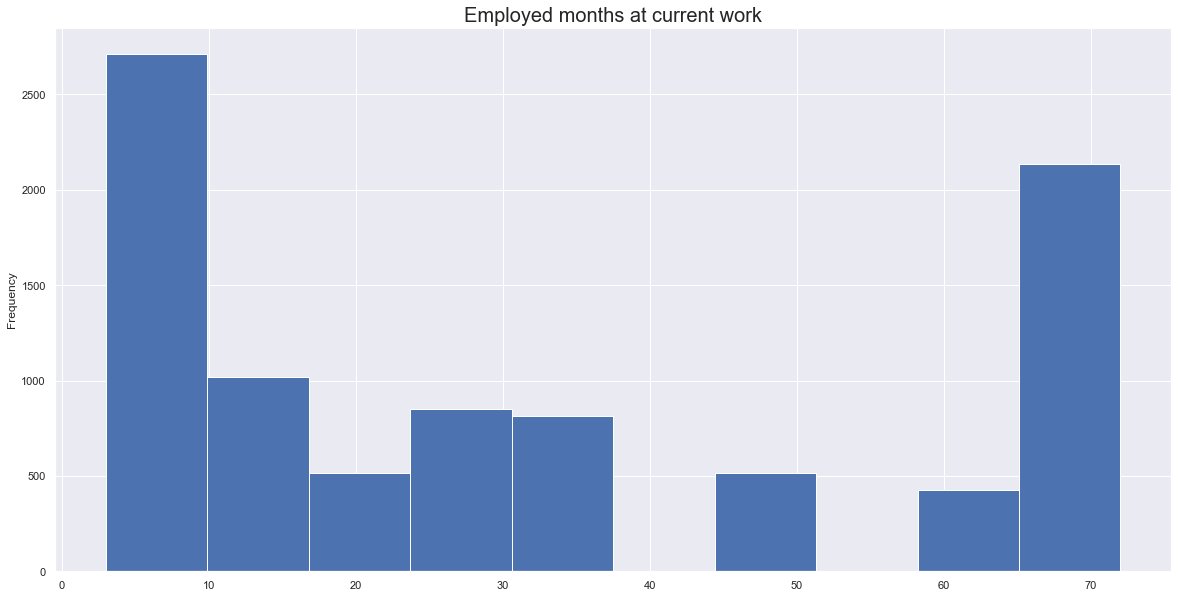

In [18]:
plt.figure(figsize=(20,10))
df['employ_how_long'].plot.hist()
plt.title('Employed months at current work', fontsize=20)

In [19]:
df.years_working_in_total.unique()

array(['3', '4', '6', '7', '19', '9', '10', '20', '15', '30', '5', '13',
       '8', '21', '14', '25', '26', '18', '16', '1', '38', '29', '24',
       '28', '22', '40', '2', '35', '11', '41', '12', '23', '33', '3.5',
       '27', '17', '34', '39', '36', '43', '45', '32', '31', '37', '0.3',
       '0.4', '0.5', '1.5', '42', '44', '3,5', '1.8701', '1,5', '0',
       '20m', '16 metu', '5.5', '2.5', '0,4', '0.6', '1.3', '1.6',
       '1 metai', '2, 4', '2m', '5 metai', '0.7', '0.8', '7.5', '47',
       '1.2', '0,6', '0,3', '2,5', '1.8', '4.5', '0.9', '8 men', '1.6m',
       '46', '5 mėnesiai', '0,8', '4men', 'virs 10', '2016 08 04',
       '1metai', '10 metų', '20 metu', '9m', '1m', '20 metų', '1.5 m',
       '4 metai', '3-4', '2metai', '3 metai', '25+', 'apie 10 m.',
       '6 metai', '17m.'], dtype=object)

In [20]:
df.years_working_in_total = df.years_working_in_total.str.replace('[^0-9]', '')
df.years_working_in_total = df.years_working_in_total.astype('int8')

In [21]:
df[df.years_working_in_total > df.age].shape

(29, 39)

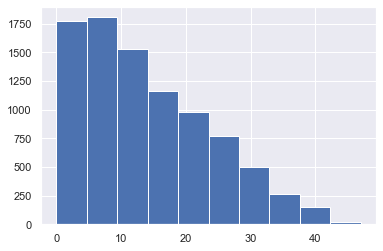

In [22]:
#some workers are working more years than they are aged. Seems this column may be corrupted
df[df.years_working_in_total < df.age].years_working_in_total.hist()

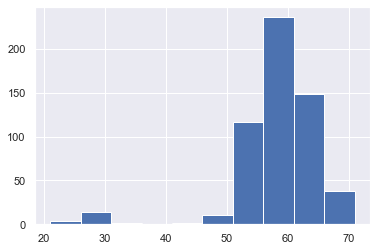

In [23]:
#Dont use - years_working_in_total - may be corrupted
df[df.years_working_in_total > 30].age.hist()

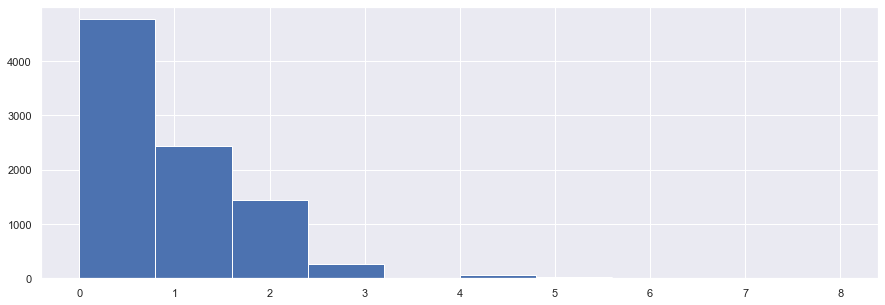

In [24]:
df.dependants.hist(figsize = (15,5))

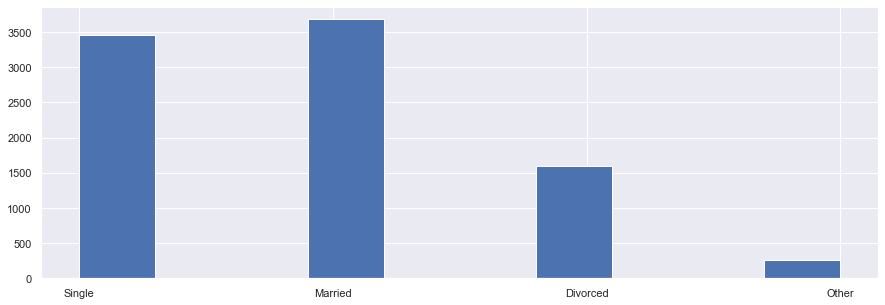

In [25]:
df.marital_status.hist(figsize = (15,5))

Text(0.5, 1.0, 'outstanding_debts')

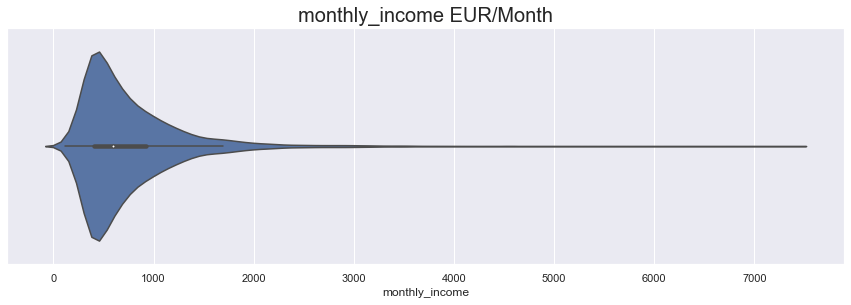

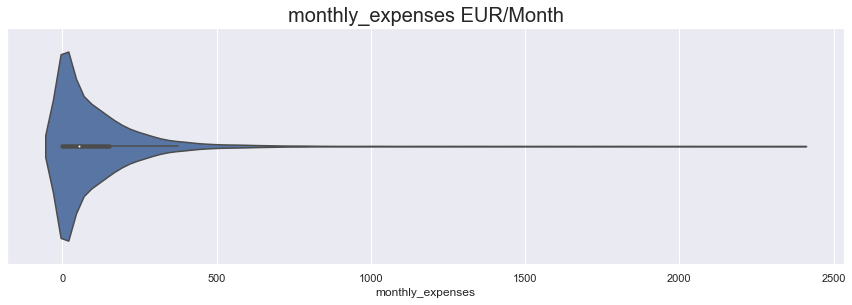

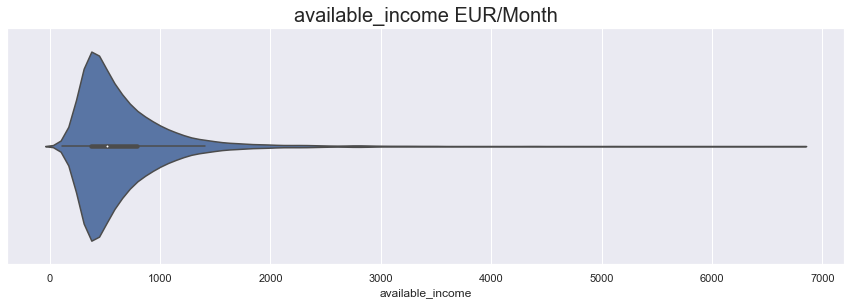

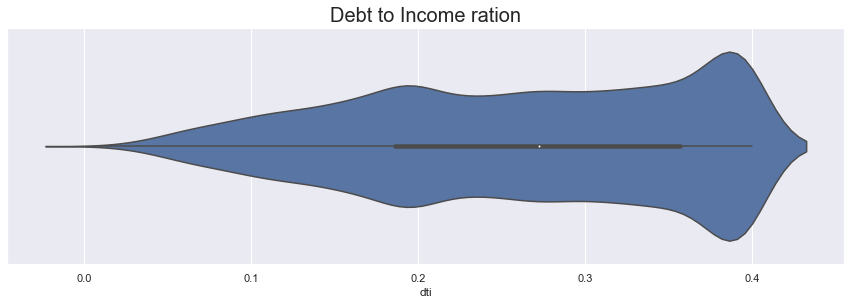

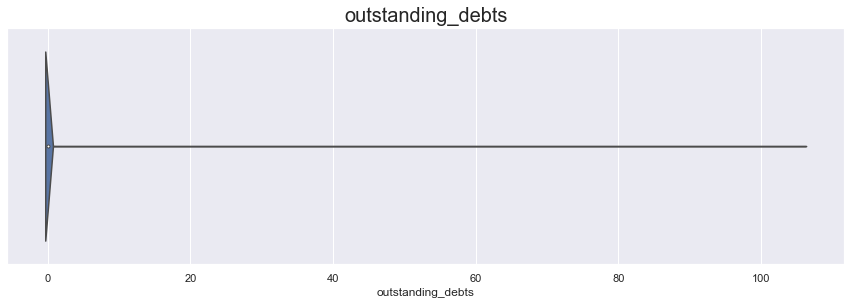

In [26]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
ax = sns.violinplot(x='monthly_income', data=df,) 
ax.set_title('monthly_income EUR/Month', fontsize=20)

plt.figure(figsize=(15,20))
plt.subplot(4,1,2)
ax = sns.violinplot(x='monthly_expenses', data=df,) 
ax.set_title('monthly_expenses EUR/Month', fontsize=20)

plt.figure(figsize=(15,20))
plt.subplot(4,1,3)
ax = sns.violinplot(x='available_income', data=df,) 
ax.set_title('available_income EUR/Month', fontsize=20)

plt.figure(figsize=(15,20))
plt.subplot(4,1,3)
ax = sns.violinplot(x='dti', data=df,) 
ax.set_title('Debt to Income ration', fontsize=20)

plt.figure(figsize=(15,20))
plt.subplot(4,1,4)
ax = sns.violinplot(x='outstanding_debts', data=df,) 
ax.set_title('outstanding_debts', fontsize=20)

In [27]:
#Drop monthly_expenses - becuase it seems suspicious that more than 50% of people declare ti have expenses less than 100$
df[df.monthly_expenses < 100].head()

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date
0,32692,2019-09-04,2019-09-05,2019-10-05,1,1,Raimonda98,"""32692-Automobiliui",Car,D,0,3305,36,0.26,0.26,3305.0,150.63,0.0,0.0,0.0,ok,FR,Female,Prienų r.,21,Vocational education,Employed,Rušiuotojas / Sorting operator,6,3,0,Single,2019-09-04 00:00:00,503,0,503,0.2995,0,-
1,32691,2019-09-04,2019-09-05,2019-10-05,1,1,bkar,"""32691-Vartojimui",Other Purposes,D,0,1900,36,0.26,0.26,1900.0,86.59,0.0,0.0,0.0,ok,FR,Male,Joniškio r.,25,Vocational education,Employed,Mechanikas / Mechanic,3,4,0,Single,2019-09-04 00:00:00,345,17,328,0.3003,0,2018-01-04 00:00:00
3,32674,2019-09-04,2019-09-04,2019-10-04,1,1,karturas,"""32674-Vartojimui",Other Purposes,B,0,1040,12,0.13,0.13,1040.0,96.26,0.0,0.0,0.0,ok,FR,Male,Vilnius,26,High school,Employed,Vairuotojas / Driver,36,7,1,Married,2019-09-04 00:00:00,484,0,484,0.1989,0,-
4,32666,2019-09-04,2019-09-05,2019-10-05,1,1,RasaMeska,"""32666-Vartojimui",Other Purposes,B,0,2830,24,0.13,0.13,2830.0,143.81,0.0,0.0,0.0,ok,FR,Female,Panevėžys,33,Post graduate,Employed,Socialinė darbuotoja / Social worker,15,3,2,Married,2019-09-04 00:00:00,849,21,828,0.1941,0,-
5,32638,2019-09-03,2019-09-04,2019-10-04,1,1,Nina61,"""32638-Vartojimui",Other Purposes,C,0,2750,36,0.21,0.21,2750.0,114.94,0.0,0.0,0.0,ok,FR,Female,Skuodo r.,57,High school,Employed,Pagalbinė darbuotoja / Assistant worker,24,19,0,Divorced,2019-09-03 00:00:00,581,26,555,0.2426,0,-


In [28]:
#Dropping unneeded columnts to free some memory
df = df.drop(columns=['loan_paid_date','first_installement_date','loan_paid_status','confirm_status',
                 'post_town', 'occupation','username','listing_title','job_loss_insurance', 'preferred_rate', 
                 'amount_outstanding', 'principal_repaid', 'interest_paid', 'arrears', 'type', 'credit_check_date',
                 'years_working_in_total', 'monthly_expenses','outstanding_debts', 'last_debt_date' ])

In [29]:
df.head()

,listing_id,creation_date,listing_category,credit_score,loan_amount,loan_period,effective_rate,monthly_installment,loan_status,gender,age,education,employment_status,employ_how_long,dependants,marital_status,monthly_income,available_income,dti
0,32692,2019-09-04,Car,D,3305,36,0.26,150.63,ok,Female,21,Vocational education,Employed,6,0,Single,503,503,0.2995
1,32691,2019-09-04,Other Purposes,D,1900,36,0.26,86.59,ok,Male,25,Vocational education,Employed,3,0,Single,345,328,0.3003
2,32687,2019-09-04,Other Purposes,C,665,12,0.19,63.79,ok,Female,41,Graduate,Employed,60,1,Married,1060,863,0.2460
3,32674,2019-09-04,Other Purposes,B,1040,12,0.13,96.26,ok,Male,26,High school,Employed,36,1,Married,484,484,0.1989
4,32666,2019-09-04,Other Purposes,B,2830,24,0.13,143.81,ok,Female,33,Post graduate,Employed,15,2,Married,849,828,0.1941


## Preprocessing data

In [30]:
features = ['listing_category','loan_amount','loan_period','effective_rate','monthly_installment',
            'gender','age','education','employment_status','employ_how_long','dependants',
            'marital_status','monthly_income','available_income','dti']

In [31]:
for feature in features:
    print(f'was {feature}:', df[feature].dtypes)
    if df[feature].dtypes == 'object':
        df[feature] = df[feature].astype('category').cat.codes
    elif df[feature].dtypes == 'float64':
        df[feature] = df[feature].astype(int) 
    print(f'now {feature}:', df[feature].dtypes)

was listing_category: object
now listing_category: int8
was loan_amount: int64
now loan_amount: int64
was loan_period: int64
now loan_period: int64
was effective_rate: float64
now effective_rate: int32
was monthly_installment: float64
now monthly_installment: int32
was gender: object
now gender: int8
was age: int64
now age: int64
was education: object
now education: int8
was employment_status: object
now employment_status: int8
was employ_how_long: int32
now employ_how_long: int32
was dependants: int64
now dependants: int64
was marital_status: object
now marital_status: int8
was monthly_income: int64
now monthly_income: int64
was available_income: int64
now available_income: int64
was dti: float64
now dti: int32


In [32]:
df.head()

,listing_id,creation_date,listing_category,credit_score,loan_amount,loan_period,effective_rate,monthly_installment,loan_status,gender,age,education,employment_status,employ_how_long,dependants,marital_status,monthly_income,available_income,dti
0,32692,2019-09-04,1,D,3305,36,0,150,ok,0,21,3,0,6,0,3,503,503,0
1,32691,2019-09-04,6,D,1900,36,0,86,ok,1,25,3,0,3,0,3,345,328,0
2,32687,2019-09-04,6,C,665,12,0,63,ok,0,41,0,0,60,1,1,1060,863,0
3,32674,2019-09-04,6,B,1040,12,0,96,ok,1,26,1,0,36,1,1,484,484,0
4,32666,2019-09-04,6,B,2830,24,0,143,ok,0,33,2,0,15,2,1,849,828,0


## Building Model 1
Predict credit score.

In [33]:
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df['credit_score'].unique()

In [ ]:
df['credit_score'] = df['credit_score'].astype('category').cat.codes

In [ ]:
target = 'credit_score'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25)

In [ ]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=100)
m.fit(X_train, y_train)

In [ ]:
train_score = m.score(X_train, y_train)
test_score = m.score(X_test,y_test)
print(f'Train score {train_score} \nTest score {test_score}')

### Feature importance | Model 1

In [ ]:
importances = m.feature_importances_

In [ ]:
std = np.std([tree.feature_importances_ for tree in m.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(df[features].shape[1]):
    print(features[f],"%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df[features].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df[features].shape[1]), indices)
plt.xlim([-1, df[features].shape[1]])
plt.show()

In [ ]:
features_important = ['loan_amount','loan_period','effective_rate','monthly_installment','gender','age','education']
X_train, X_test, y_train, y_test = train_test_split(df[features_important], df[target], test_size=0.15)
m2 = RandomForestClassifier(n_jobs=-1, n_estimators=100)
m2.fit(X_train, y_train)

In [ ]:
train_score = m2.score(X_train, y_train)
test_score = m2.score(X_test,y_test)
print(f'Train score {train_score} \nTest score {test_score}')

### Model preformance
Model 1 (with most features) Test score ~57%

Model 1 (with imporant features only) test score ~70%

## Building Model 2
Predict if customer will default.

In [34]:
#prediction target 2
df['loan_status'].unique()

array(['ok', 'late', 'arrears', 'default'], dtype=object)

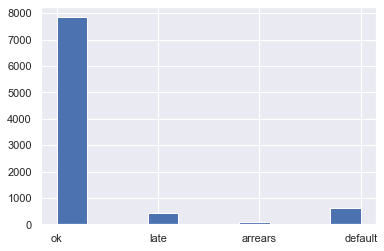

In [35]:
#lets keep only okey and default values.
df['loan_status'].hist()

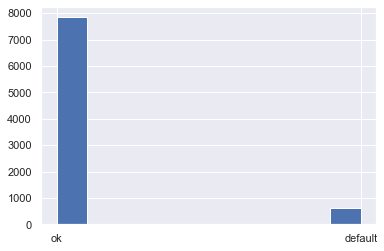

In [36]:
df = df[(df['loan_status'] == 'ok') | (df['loan_status'] == 'default')]
df['loan_status'].hist()

In [58]:
#Given some loans are new, so borrowers still can fail. Let's use last default client as benchmark
df[df.loan_status == 'default' ]
df.head()
#Last date -2019-06-03

c:\users\val\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,listing_id,creation_date,listing_category,credit_score,loan_amount,loan_period,effective_rate,monthly_installment,loan_status,gender,age,education,employment_status,employ_how_long,dependants,marital_status,monthly_income,available_income,dti
804,28085,2019-06-01,1,D,1655,45,0,68,0,1,22,3,0,9,0,3,393,314,0
805,28084,2019-06-01,2,A,1800,15,0,134,1,1,53,3,0,72,0,1,906,906,0
806,28083,2019-06-01,6,C,500,24,0,27,1,0,42,3,0,72,0,1,601,395,0
807,28080,2019-06-01,2,D,1035,36,0,47,1,0,22,3,0,9,0,3,487,422,0
809,28066,2019-06-01,6,D,885,30,0,44,1,0,56,3,0,60,1,1,853,762,0


In [38]:
df = df[df['creation_date'] < '2019-06-02']
df.shape

(7690, 19)

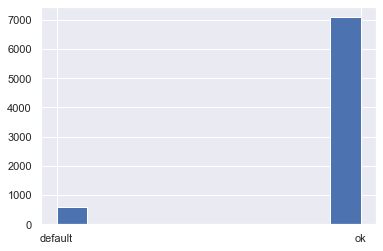

In [39]:
df['loan_status'].hist()

In [40]:
df['loan_status'] = df['loan_status'].astype('category').cat.codes

In [59]:
target = 'loan_status'
features = ['listing_category','loan_amount','loan_period','effective_rate','monthly_installment',
            'gender','age','education','employment_status','employ_how_long','dependants',
            'marital_status','monthly_income','available_income','dti']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25)

In [61]:
model2 = RandomForestClassifier(n_jobs=-1, n_estimators=100)
%time model2.fit(X_train, y_train)

Wall time: 233 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [62]:
train_score = model2.score(X_train, y_train)
test_score = model2.score(X_test,y_test)
print(f'Train score {train_score} \nTest score {test_score}')

Train score 1.0 
Test score 0.9240769630785232


### Model 2 (Feature importance)

In [63]:
importances = model2.feature_importances_

Feature ranking:
listing_category 1. feature 4 (0.162325)
loan_amount 2. feature 13 (0.129019)
loan_period 3. feature 12 (0.128864)
effective_rate 4. feature 1 (0.125557)
monthly_installment 5. feature 6 (0.113056)
gender 6. feature 2 (0.089145)
age 7. feature 9 (0.073963)
education 8. feature 0 (0.041944)
employment_status 9. feature 10 (0.038242)
employ_how_long 10. feature 7 (0.032664)
dependants 11. feature 11 (0.032042)
marital_status 12. feature 5 (0.022551)
monthly_income 13. feature 8 (0.010627)
available_income 14. feature 14 (0.000000)
dti 15. feature 3 (0.000000)


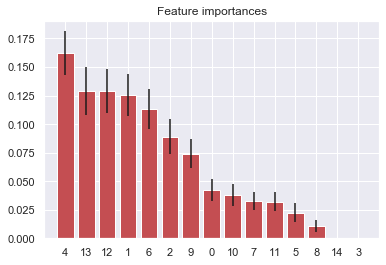

In [64]:
std = np.std([tree.feature_importances_ for tree in model2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(df[features].shape[1]):
    print(features[f],"%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df[features].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df[features].shape[1]), indices)
plt.xlim([-1, df[features].shape[1]])
plt.show()

In [66]:
important_features = ['loan_amount','loan_period','effective_rate','monthly_installment',
            'gender','age','education','employment_status','employ_how_long','dependants',
            'marital_status'] #'listing_category'

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df[important_features], df[target], test_size=0.25)

In [68]:
model2v2 = RandomForestClassifier(n_jobs=-1, n_estimators=100)
%time model2v2.fit(X_train, y_train)

Wall time: 233 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [69]:
train_score = model2v2.score(X_train, y_train)
test_score = model2v2.score(X_test,y_test)
print(f'Train score {train_score} \nTest score {test_score}')

Train score 0.9998265996185192 
Test score 0.9188767550702028


## Comments to finbee.lt
1. Would be nice to have more recent data
2. Some data is definitely collected wrongly (years_working_in_total)
3. monthly_expenses - More than 50% have lower than 100EUR/month - very suspicious
4. outstanding_debts - most are 0, no data is collected